## Overview of the Dataset

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('./data/old-spanish-corpus-chunked.tsv', sep='\t', dtype={'date': str})
df

C:\Users\santi\AppData\Local\Temp\ipykernel_16344\428079709.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/old-spanish-corpus-chunked.tsv', sep='\t', dtype={'date': str})


,source,source_id,source_text_id,chunk_id,title,date,place,text
0,The British Library,3436138,9,0,"Historia de la conquista de México, etc [With ...",1809,London,"HISTORIA DE LA CONQUISTA PE MÉXICO, POBLACIÓN ..."
1,The British Library,3436138,10,0,"Historia de la conquista de México, etc [With ...",1809,London,"This Work, as well as LAS FÁBULAS LITERARIAS, ..."
2,The British Library,3436138,11,0,"Historia de la conquista de México, etc [With ...",1809,London,"HISTORIA De la Conquista, población y Progreso..."
3,The British Library,3436138,12,0,"Historia de la conquista de México, etc [With ...",1809,London,"CONQUISTA quartel observando la batalla, y rec..."
4,The British Library,3436138,12,1,"Historia de la conquista de México, etc [With ...",1809,London,Pon deró con afectada seguridad el atrevimient...
...,...,...,...,...,...,...,...,...
1270984,Project Gutenberg,53294,916,0,Recuerdos Del Tiempo Viejo,1817-1893,?,Pero amo á Barcelona por tiranía de ley in...
1270985,Project Gutenberg,53294,917,0,Recuerdos Del Tiempo Viejo,1817-1893,?,Barcelona trabaja... y á su existencia el ...
1270986,Project Gutenberg,53294,919,0,Recuerdos Del Tiempo Viejo,1817-1893,?,Olvidaba que entre ambas hay diferencia: n...
1270987,Project Gutenberg,53294,920,0,Recuerdos Del Tiempo Viejo,1817-1893,?,La diferencia es esta: pero es preciso que...


C:\Users\santi\AppData\Local\Temp\ipykernel_16344\1998087409.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{int(x)}%' for x in plt.gca().get_xticks()])  # Adjust x-axis tick labels


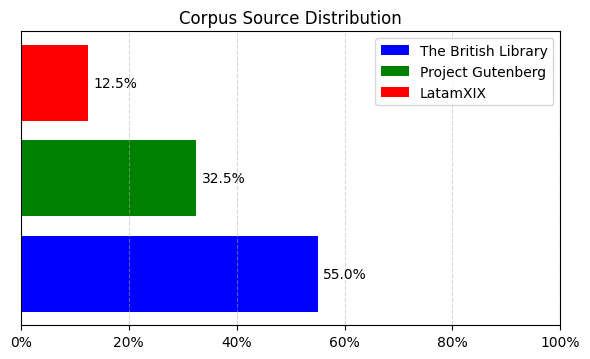

In [3]:
source_counts = df['source'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 3.70))  # Adjust figsize for horizontal layout
colors = ['blue', 'green', 'red', 'purple', 'orange']
bar_height = 0.8  # Change bar_height for horizontal bars
y_positions = range(len(source_counts))  # Change x_positions to y_positions

for i, (source, count) in enumerate(source_counts.items()):
    plt.barh(y_positions[i], count, color=colors[i % len(colors)], height=bar_height, label=source)  # Use barh() instead of bar()
    plt.text(count + 1, y_positions[i], f'{count:.1f}%', va='center', ha='left')  # Adjust text position for horizontal bars

plt.title('Corpus Source Distribution')
plt.xlim(0, 100)  # Change xlim for horizontal layout
plt.gca().axes.get_yaxis().set_visible(False)  # Hide y-axis ticks
plt.gca().set_xticklabels([f'{int(x)}%' for x in plt.gca().get_xticks()])  # Adjust x-axis tick labels
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Adjust grid for horizontal layout
plt.tight_layout()
plt.savefig('./imgs/corpus-source-distribution.png')
plt.show()


In [4]:
df['date_low'] = df['date'].str.split('-').str[0]
df['date_low'] = df['date_low'].astype(int)
df['date_high'] = df['date'].apply(lambda x: x.split('-')[1] if len(x.split('-')) == 2 else x.split('-')[0])
df['date_high'] = df['date_high'].astype(int)

In [5]:
print(f"\ndates: {df['date_low'].min()} - {df['date_high'].max()}")


dates: 1800 - 2022


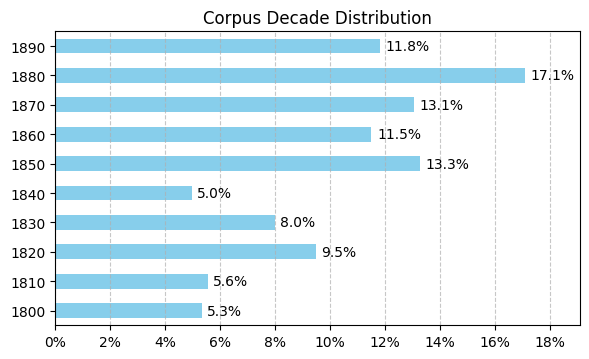

In [14]:
import matplotlib.pyplot as plt

df['selected_date'] = df.apply(lambda row: row['date_low'] if 1800 <= row['date_low'] <= 1914 else row['date_high'], axis=1)
df['decade'] = df['selected_date'] // 10 * 10

decade_counts = df['decade'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(6, 3.7))
bars = decade_counts.sort_index().plot(kind='barh', color='skyblue')
plt.title('Corpus Decade Distribution')
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Change x-axis ticks to percentage
plt.xticks(ticks=plt.xticks()[0], labels=[f'{int(tick)}%' for tick in plt.xticks()[0]])

for bar, count in zip(bars.patches, decade_counts.sort_index()):
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2, f'{count:.1f}%', ha='left', va='center')

plt.xlim(0, decade_counts.max() + 2)
plt.tight_layout()
plt.savefig('./imgs/corpus-decade-distribution.png')
plt.show()
